# **Automatidata project**
**Course 5 - Regression Analysis: Simplify complex data relationships**

The data consulting firm Automatidata has recently hired you as the newest member of their data analytics team. Their newest client, the NYC Taxi and Limousine Commission (New York City TLC), wants the Automatidata team to build a multiple linear regression model to predict taxi fares using existing data that was collected over the course of a year. The team is getting closer to completing the project, having completed an initial plan of action, initial Python coding work, EDA, and A/B testing.

The Automatidata team has reviewed the results of the A/B testing. Now it’s time to work on predicting the taxi fare amounts. You’ve impressed your Automatidata colleagues with your hard work and attention to detail. The data team believes that you are ready to build the regression model and update the client New York City TLC about your progress.

A notebook was structured and prepared to help you in this project. Please complete the following questions.

# Course 5 End-of-course project: Build a multiple linear regression model

In this activity, you will build a multiple linear regression model. As you've learned, multiple linear regression helps you estimate the linear relationship between one continuous dependent variable and two or more independent variables. For data science professionals, this is a useful skill because it allows you to consider more than one variable against the variable you're measuring against. This opens the door for much more thorough and flexible analysis to be completed. 

Completing this activity will help you practice planning out and buidling a multiple linear regression model based on a specific business need. The structure of this activity is designed to emulate the proposals you will likely be assigned in your career as a data professional. Completing this activity will help prepare you for those career moments.
<br/>

**The purpose** of this project is to demostrate knowledge of EDA and a multiple linear regression model

**The goal** is to build a multiple linear regression model and evaluate the model
<br/>
*This activity has three parts:*

**Part 1:** EDA & Checking Model Assumptions
* What are some purposes of EDA before constructing a multiple linear regression model?

**Part 2:** Model Building and evaluation
* What resources do you find yourself using as you complete this stage?

**Part 3:** Interpreting Model Results

* What key insights emerged from your model(s)?

* What business recommendations do you propose based on the models built?

# Build a multiple linear regression model

<img src="images/Pace.png" width="100" height="100" align=left>

# **PACE stages**


Throughout these project notebooks, you'll see references to the problem-solving framework PACE. The following notebook components are labeled with the respective PACE stage: Plan, Analyze, Construct, and Execute.

<img src="images/Plan.png" width="100" height="100" align=left>


## PACE: **Plan**

Consider the questions in your PACE Strategy Document to reflect on the Plan stage.


### Task 1. Imports and loading
Import the packages that you've learned are needed for building linear regression models.

In [44]:
# Imports
# Packages for numerics + dataframes
import numpy as np
import pandas as pd

# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Packages for date conversions for calculating trip durations
#from datetime import datetime

# Packages for OLS, MLR, confusion matrix
import statsmodels.api as sm
from statsmodels.formula.api import ols
#from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics 
from sklearn.preprocessing import StandardScaler

**Note:** `Pandas` is used to load the NYC TLC dataset. As shown in this cell, the dataset has been automatically loaded in for you. You do not need to download the .csv file, or provide more code, in order to access the dataset and proceed with this lab. Please continue with this activity by completing the following instructions.

In [45]:
# Load dataset into dataframe 
df0=pd.read_csv("2017_Yellow_Taxi_Trip_Data.csv") 

<img src="images/Analyze.png" width="100" height="100" align=left>

## PACE: **Analyze**

In this stage, consider the following question where applicable to complete your code response:

* What are some purposes of EDA before constructing a multiple linear regression model?


EDA is important to get to know your data before you begin constructing any models. It is important to find and deal with missing values and outliers, and to check which variables may have a linear relationship with the variable you wish to predict.

### Task 2a. Explore data with EDA

Analyze and discover data, looking for correlations, missing data, outliers, and duplicates.

Start with `.shape` and `.info()`.

In [46]:
# Start with `.shape` and `.info()`
print("Dataframe shape: ", df0.shape)
print("Info: ")
print(df0.info())

Dataframe shape:  (22699, 18)
Info: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 18 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             22699 non-null  int64  
 1   VendorID               22699 non-null  int64  
 2   tpep_pickup_datetime   22699 non-null  object 
 3   tpep_dropoff_datetime  22699 non-null  object 
 4   passenger_count        22699 non-null  int64  
 5   trip_distance          22699 non-null  float64
 6   RatecodeID             22699 non-null  int64  
 7   store_and_fwd_flag     22699 non-null  object 
 8   PULocationID           22699 non-null  int64  
 9   DOLocationID           22699 non-null  int64  
 10  payment_type           22699 non-null  int64  
 11  fare_amount            22699 non-null  float64
 12  extra                  22699 non-null  float64
 13  mta_tax                22699 non-null  float64
 14  tip_amount       

Check for missing data and duplicates using `.isna()` and `.drop_duplicates()`.

In [47]:
# Check for missing data and duplicates using .isna() and .drop_duplicates()
print("Missing data: ")
print(df0.isna().sum())
print("Original shape: ", df0.shape)
print("Shape after dropping duplicates: ", df0.drop_duplicates().shape)

Missing data: 
Unnamed: 0               0
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
store_and_fwd_flag       0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
dtype: int64
Original shape:  (22699, 18)
Shape after dropping duplicates:  (22699, 18)


Use `.describe()`.

In [48]:
# Use .describe()
df0.describe(include="all")

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,2.269900e+04,22699.000000,22699,22699,22699.000000,22699.000000,22699.000000,22699,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000,22699.000000
unique,NaN,NaN,22687,22688,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,07/03/2017 3:45:19 PM,10/18/2017 8:07:45 PM,NaN,NaN,NaN,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,2,2,NaN,NaN,NaN,22600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.675849e+07,1.556236,NaN,NaN,1.642319,2.913313,1.043394,NaN,162.412353,161.527997,1.336887,13.026629,0.333275,0.497445,1.835781,0.312542,0.299551,16.310502
std,3.274493e+07,0.496838,NaN,NaN,1.285231,3.653171,0.708391,NaN,66.633373,70.139691,0.496211,13.243791,0.463097,0.039465,2.800626,1.399212,0.015673,16.097295
min,1.212700e+04,1.000000,NaN,NaN,0.000000,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,-120.000000,-1.000000,-0.500000,0.000000,0.000000,-0.300000,-120.300000
25%,2.852056e+07,1.000000,NaN,NaN,1.000000,0.990000,1.000000,NaN,114.000000,112.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.750000
50%,5.673150e+07,2.000000,NaN,NaN,1.000000,1.610000,1.000000,NaN,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,8.537452e+07,2.000000,NaN,NaN,2.000000,3.060000,1.000000,NaN,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000


### Task 2b. Convert pickup & dropoff columns to datetime


In [49]:
# Check the format of the data
df0.dtypes

Unnamed: 0                 int64
VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dtype: object

In [50]:
# Convert datetime columns to datetime
df0["tpep_pickup_datetime"] = pd.to_datetime(df0["tpep_pickup_datetime"])
df0["tpep_dropoff_datetime"] = pd.to_datetime(df0["tpep_dropoff_datetime"])
#Can also use format='%m/%d/%Y %I:%M:%S %p' to be more specific

### Task 2c. Create duration column

Create a new column called `duration` that represents the total number of minutes that each taxi ride took.

In [51]:
# Create `duration` column
df0['duration'] = (df0['tpep_dropoff_datetime'] - df0['tpep_pickup_datetime']) / pd.Timedelta(minutes=1)
#alternative: df0['duration'] = (df0['tpep_dropoff_datetime'] - df0['tpep_pickup_datetime'])/np.timedelta64(1,'m')
df0.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667


### Outliers

Call `df.info()` to inspect the columns and decide which ones to check for outliers.

In [52]:
### YOUR CODE HERE ###
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22699 entries, 0 to 22698
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Unnamed: 0             22699 non-null  int64         
 1   VendorID               22699 non-null  int64         
 2   tpep_pickup_datetime   22699 non-null  datetime64[ns]
 3   tpep_dropoff_datetime  22699 non-null  datetime64[ns]
 4   passenger_count        22699 non-null  int64         
 5   trip_distance          22699 non-null  float64       
 6   RatecodeID             22699 non-null  int64         
 7   store_and_fwd_flag     22699 non-null  object        
 8   PULocationID           22699 non-null  int64         
 9   DOLocationID           22699 non-null  int64         
 10  payment_type           22699 non-null  int64         
 11  fare_amount            22699 non-null  float64       
 12  extra                  22699 non-null  float64       
 13  m

Keeping in mind that many of the features will not be used to fit your model, the most important columns to check for outliers are likely to be:
* `trip_distance`
* `fare_amount`
* `duration`



### Task 2d. Box plots

Plot a box plot for each feature: `trip_distance`, `fare_amount`, `duration`.

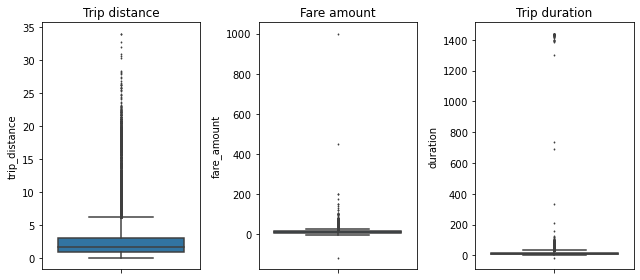

In [53]:
#Make 3 figures in subplots
fig, axes = plt.subplots(1, 3, figsize = (9,4))
#fig.suptitle('Boxplots for outlier detection')
sns.boxplot(y=df0['trip_distance'], fliersize=1, ax=axes[0])
axes[0].set_title("Trip distance")
sns.boxplot(y=df0['fare_amount'], fliersize=1, ax=axes[1])
axes[1].set_title("Fare amount")
sns.boxplot(y=df0['duration'], fliersize=1, ax=axes[2])
axes[2].set_title("Trip duration")
# Use matplotlib's tight_layout() function to add space between plots for a cleaner appearance.
plt.tight_layout()
# Show the plot.
plt.show()

**Questions:** 
1. Which variable(s) contains outliers? 

2. Are the values in the `trip_distance` column unbelievable?

3. What about the lower end? Do distances, fares, and durations of 0 (or negative values) make sense?

**My answers:** 

All three variables have outliers in the mathematical sense (in terms of quartiles: < Q1 - 1.5\*IQ or > Q3 + 1.5\*IQ), but many of these values seem real (e.g., the long trip distances are all plausible).

"fare_amount" certainly contains a few unrealistic values - at least one negative value, which is not possible, and a value over 1000, which is unlikely (one over 400 also seems unlikely, but it would need to be investigated - I will look at trip distance and duration, to check if it is real or not). 

"duration" has several points around 1400 minutes, which is around 24 hours, so very unlikely. It could be that the date of dropoff or pickup was incorrectly registered. It looks like there may also be a negatvie value, which cannot be real.

"trip_distance" does not seem to have any obviously unreal values (except for possibly values at 0, which cannot be real). Even the largest distances seem plausible.

Any values of 0 or negative values in any of these variables do not make sense and cannot be real.

In [54]:
#I will check the two rides where the fare amount was larger than $400, to see if they could be real
df0[(df0['fare_amount'] > 400)].head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
8476,11157412,1,2017-02-06 05:50:10,2017-02-06 05:51:08,1,2.6,5,N,226,226,1,999.99,0.0,0.0,200.0,0.0,0.3,1200.29,0.966667
20312,107558404,2,2017-12-19 09:40:46,2017-12-19 09:40:55,2,0.0,5,N,265,265,2,450.00,0.0,0.0,0.0,0.0,0.3,450.30,0.150000


As we can see, the trip distance and duration of these 2 rides are very short and are not consistent with the fare being so large (in fact, for the $450 trip, the distance is 0 and the duration in both is not even one minute). These are erroneous data that should be removed (I will do this later on).

### Task 2e. Imputations

#### `trip_distance` outliers

You know from the summary statistics that there are trip distances of 0. Are these reflective of erroneous data, or are they very short trips that get rounded down?

To check, sort the column values, eliminate duplicates, and inspect the least 10 values. Are they rounded values or precise values?

In [55]:
# Are trip distances of 0 bad data or very short trips rounded down?
df0.drop_duplicates(subset=['trip_distance'], keep='first').sort_values(by='trip_distance', ascending=True).head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
128,52987734,1,2017-06-22 08:05:33,2017-06-22 08:05:40,1,0.00,3,N,231,231,2,20.0,0.0,0.0,0.0,0.0,0.3,20.3,0.116667
2985,99495069,2,2017-11-24 04:32:18,2017-11-24 04:32:23,1,0.01,1,N,263,263,2,2.5,0.5,0.5,0.0,0.0,0.3,3.8,0.083333
323,111191930,2,2017-01-14 19:04:51,2017-01-14 19:05:01,2,0.02,1,N,106,106,2,2.5,0.0,0.5,0.0,0.0,0.3,3.3,0.166667
3158,21592964,2,2017-03-16 05:51:31,2017-03-16 05:51:43,1,0.03,1,N,142,43,2,2.5,0.5,0.5,0.0,0.0,0.3,3.8,0.200000
1510,24848461,2,2017-03-25 04:37:43,2017-03-25 04:37:49,1,0.04,1,N,264,24,2,2.5,0.5,0.5,0.0,0.0,0.3,3.8,0.100000
10146,69289782,2,2017-08-16 14:54:35,2017-08-16 14:59:10,1,0.05,1,N,7,193,1,4.5,0.0,0.5,0.0,0.0,0.3,5.3,4.583333
4423,97329905,2,2017-11-16 20:13:30,2017-11-16 20:14:50,2,0.06,1,N,237,237,4,-3.0,-0.5,-0.5,0.0,0.0,-0.3,-4.3,1.333333
922,70604386,2,2017-08-21 11:23:01,2017-08-21 11:24:46,2,0.07,1,N,161,161,2,3.0,0.0,0.5,0.0,0.0,0.3,3.8,1.750000
4623,2880155,2,2017-01-11 14:46:37,2017-01-11 14:48:48,6,0.08,1,N,186,186,2,3.5,0.0,0.5,0.0,0.0,0.3,4.3,2.183333
22035,104619808,2,2017-12-10 12:20:19,2017-12-10 12:20:56,1,0.09,1,N,234,234,2,2.5,0.0,0.5,0.0,0.0,0.3,3.3,0.616667


The distances are captured with a high degree of precision. However, it might be possible for trips to have distances of zero if a passenger summoned a taxi and then changed their mind. Besides, are there enough zero values in the data to pose a problem?

Calculate the count of rides where the `trip_distance` is zero.

In [56]:
#Check how many rides have a distance of 0mi
#df0.groupby('trip_distance')['trip_distance'].count()
df0['trip_distance'][(df0['trip_distance'] == 0)].count()

148

**My comment**: We can see that there are very few rows with a value of 0 for trip distance, so we will not be losing much if we just delete these rows. This will avoid biasing the model with trips that were never actually done. 

In [57]:
df1 = df0[df0['trip_distance'] > 0] #Creating a new dataframe to preserve the original
df1['trip_distance'].describe()

count    22551.000000
mean         2.932433
std          3.657483
min          0.010000
25%          1.000000
50%          1.630000
75%          3.090000
max         33.960000
Name: trip_distance, dtype: float64

#### `fare_amount` outliers

In [58]:
df1['fare_amount'].describe()

count    22551.000000
mean        12.960317
std         12.699077
min       -120.000000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

**Question:** What do you notice about the values in the `fare_amount` column?

**My answer:** There are negative values, which are unreal, and very large values like 999.99 which seem very unlikely.

The original lab instructed me to impute values less than $0 with `0`. However, I would prefer to check how many values are <= 0 and remove them, so as not to bias the result of the regression with erroneous data. 

In [59]:
print(df0['fare_amount'][(df0['fare_amount'] <= 0)].count())
print(df1['fare_amount'][(df1['fare_amount'] <= 0)].count())

20
16


As we can see, 4 of these rows have already been removed (because the trip_distance was <=0), and there are only another 16 rows with fare_amount <= 0. I am fine with removing 16 rows from the dataset. 

In [60]:
#Rather than impute values less than $0 with 0, I will remove values less than or equal to $0
df1 = df1[(df1['fare_amount'] > 0)]
df1['fare_amount'].describe()

count    22535.000000
mean        12.976663
std         12.666129
min          0.010000
25%          6.500000
50%          9.500000
75%         14.500000
max        999.990000
Name: fare_amount, dtype: float64

Now impute the maximum value as `Q3 + (6 * IQR)`.

In [61]:
#def impute_iqr_max(column_list, iqr_factor):
#    '''
#    Impute upper-limit values in specified columns based on their interquartile range.
#
#    Arguments:
#        column_list: A list of columns to iterate over
#        iqr_factor: A number representing x in the formula:
#                    Q3 + (x * IQR). Used to determine maximum threshold,
#                    beyond which a point is considered an outlier.
#
#    The IQR is computed for each column in column_list and values exceeding
#    the upper threshold for each column are imputed with the upper threshold value.
#    '''
#    #Calculate quartiles to get Q3 and IQR
#    quartiles = np.percentile(column_list, [25, 75])
#    q3 = quartiles[1]
#    iqr = quartiles[1] - quartiles[0]
#
#    # Reassign minimum to zero
#    if column_list.min() < 0:
#        column_list[(column_list < 0)] = 0
#
#    # Calculate upper threshold
#    upper_thres = q3 + iqr_factor * iqr
#    
#    # Reassign values > threshold to threshold
#    column_list[(column_list > upper_thres)] = upper_thres
#    
#    #return new array
#    return column_list
#
#df0['fare_amount'] = impute_iqr_max(df0['fare_amount'], 6)
#df0['fare_amount'].describe()

I have commented the entire cell above because I do not agree that it is best to impute the largest values. The value chosen, of Q3 + (6 * IQR), is arbitrary and does not have any physical meaning. I do not see how this would improve the model results in any way. In fact, this could bias the model, because it would remove our ability to measure the relationship between the variables at larger values. 

I will leave them the way they are, and only remove the values of fare_amount>$400, which we have already concluded are erroneous. 

In [62]:
#Remove the value of fare_amount > $400
df1 = df1[(df1['fare_amount'] < 400)]
df1['fare_amount'].describe()

count    22534.000000
mean        12.932862
std         10.825981
min          0.010000
25%          6.500000
50%          9.500000
75%         14.500000
max        200.010000
Name: fare_amount, dtype: float64

#### `duration` outliers


In [63]:
# Call .describe() for duration outliers
df1['duration'].describe()

count    22534.000000
mean        17.062027
std         61.523663
min        -16.983333
25%          6.733333
50%         11.233333
75%         18.450000
max       1439.550000
Name: duration, dtype: float64

The `duration` column has problematic values at both the lower and upper extremities.

* **Low values:** There should be no values that represent negative time. Impute all negative durations with `0`.

* **High values:** Impute high values the same way you imputed the high-end outliers for fares: `Q3 + (6 * IQR)`.

**My comment:** Again here I would rather look into how many rows these values represent and remove the ones that really seem likely to be errors, rather than impute them with arbitrary values. 

In [64]:
print(df0['duration'][(df0['duration'] <= 0)].count())
print(df1['duration'][(df1['duration'] <= 0)].count())

27
1


Of the original 27 rows with duration <= 0, 26 have already been removed because either distance or fare was <=0. So only one more row will be removed. Now let's look at the higher values of trip duration.

In [65]:
high = np.percentile(df0['duration'], 75) + (6 * (np.percentile(df0['duration'], 75)-np.percentile(df0['duration'], 25)))
print('Q3 + (6 * IQR) = ', high)
print(df0['duration'][(df0['duration'] >= high)].count())
print(df1['duration'][(df1['duration'] >= high)].count())

Q3 + (6 * IQR) =  88.78333333333333
71
69


Two of these rows have already been removed. However, 89 minutes is not so long that we can't trust any of the values above this to be real. Instead, I'll inspect the really high values, where duration is longer than 200 minutes. 

In [66]:
print(df0['duration'][(df0['duration'] >= 200)].count())
df0[(df0['duration'] >= 200)].sort_values(by='duration')

46


,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration
29,94052446,2,2017-11-06 20:30:50,2017-11-07 00:00:00,1,30.83,1,N,132,23,1,80.0,0.5,0.5,18.56,11.52,0.3,111.38,209.166667
5051,66923363,2,2017-08-07 18:27:53,2017-08-08 00:00:00,1,14.35,1,N,132,33,1,50.5,1.0,0.5,10.46,0.00,0.3,62.76,332.116667
13219,170966,2,2017-01-08 12:30:07,2017-01-09 00:00:00,1,12.53,1,N,163,138,1,36.0,0.0,0.5,8.47,5.54,0.3,50.81,689.883333
11885,21680369,2,2017-03-16 11:43:57,2017-03-17 00:00:00,1,7.53,1,N,138,170,1,50.5,0.0,0.5,11.37,5.54,0.3,68.21,736.050000
8195,10180941,2,2017-02-12 02:21:07,2017-02-13 00:00:00,1,1.95,1,N,107,79,2,13.5,0.5,0.5,0.00,0.00,0.3,14.80,1298.883333
7169,29505980,2,2017-04-09 07:55:14,2017-04-10 07:02:02,1,1.19,1,N,161,186,2,6.5,0.0,0.5,0.00,0.00,0.3,7.30,1386.800000
17394,106091745,2,2017-12-14 11:48:00,2017-12-15 10:59:44,1,1.91,1,N,230,237,1,9.5,0.5,0.5,2.16,0.00,0.3,12.96,1391.733333
13147,93558482,2,2017-11-05 01:52:31,2017-11-06 01:04:34,1,2.04,1,N,148,170,1,10.0,0.5,0.5,2.26,0.00,0.3,13.56,1392.050000
4600,107922016,2,2017-12-20 08:24:34,2017-12-21 07:39:27,4,1.26,1,N,140,236,2,10.0,0.0,0.5,0.00,0.00,0.3,10.80,1394.883333
12944,29059760,2,2017-04-08 00:00:16,2017-04-08 23:15:57,1,0.17,5,N,138,138,4,-120.0,0.0,0.0,0.00,0.00,-0.3,-120.30,1395.683333


The first thing we notice is that all of these trips come from vendor 2. This vendor may have had issues with their meters. We can see that the first 5 rows show trips that all end on midnight. It's likely the driver forgot to turn off the meter after the trip. All other rows show durations of over 1200 minutes (20 hours). Clearly there were issues with the meters in all of these trips, and these values cannot be trusted. 

Instead of imputting these values with an arbitrary number, I will remove them so that they do not interfere with the calculation of mean trip durations for each pair of pickup and dropoff locations (which will be done in the feature engineering section below). 

In [67]:
## Impute a 0 for any negative values
#df0['duration'][(df0['duration'] < 0)] = 0
#df0['duration'].describe()

#Remove the remaining 1 row with negative value 
df1 = df1[(df1['duration'] > 0)]
df1['duration'].describe()

count    22533.000000
mean        17.063538
std         61.524611
min          0.016667
25%          6.733333
50%         11.233333
75%         18.450000
max       1439.550000
Name: duration, dtype: float64

In [68]:
## Impute the high outliers
#df0['duration'] = impute_iqr_max(df0['duration'], 6)
#df0['duration'].describe()

#Remove the very high outliers 
df1 = df1[(df1['duration'] < 200)]
df1['duration'].describe()

count    22488.000000
mean        14.416664
std         11.576530
min          0.016667
25%          6.716667
50%         11.233333
75%         18.383333
max        159.316667
Name: duration, dtype: float64

### Task 3a. Feature engineering

#### Create `mean_distance` column

When deployed, the model will not know the duration of a trip until after the trip occurs, so you cannot train a model that uses this feature. However, you can use the statistics of trips you *do* know to generalize about ones you do not know.

In this step, create a column called `mean_distance` that captures the mean distance for each group of trips that share pickup and dropoff points.

For example, if your data were:

|Trip|Start|End|Distance|
|--: |:---:|:-:|    |
| 1  | A   | B | 1  |
| 2  | C   | D | 2  |
| 3  | A   | B |1.5 |
| 4  | D   | C | 3  |

The results should be:
```
A -> B: 1.25 miles
C -> D: 2 miles
D -> C: 3 miles
```

Notice that C -> D is not the same as D -> C. All trips that share a unique pair of start and end points get grouped and averaged.

Then, a new column `mean_distance` will be added where the value at each row is the average for all trips with those pickup and dropoff locations:

|Trip|Start|End|Distance|mean_distance|
|--: |:---:|:-:|  :--   |:--   |
| 1  | A   | B | 1      | 1.25 |
| 2  | C   | D | 2      | 2    |
| 3  | A   | B |1.5     | 1.25 |
| 4  | D   | C | 3      | 3    |


Begin by creating a helper column called `pickup_dropoff`, which contains the unique combination of pickup and dropoff location IDs for each row.

One way to do this is to convert the pickup and dropoff location IDs to strings and join them, separated by a space. The space is to ensure that, for example, a trip with pickup/dropoff points of 12 & 151 gets encoded differently than a trip with points 121 & 51.

So, the new column would look like this:

|Trip|Start|End|pickup_dropoff|
|--: |:---:|:-:|  :--         |
| 1  | A   | B | 'A B'        |
| 2  | C   | D | 'C D'        |
| 3  | A   | B | 'A B'        |
| 4  | D   | C | 'D C'        |


In [69]:
# Create `pickup_dropoff` column
df1['pickup_dropoff'] = df1['PULocationID'].astype(str) + ' ' + df1['DOLocationID'].astype(str)
df1.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,1,13.0,0.0,0.5,2.76,0.0,0.3,16.56,14.066667,100 231
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,1,16.0,0.0,0.5,4.00,0.0,0.3,20.80,26.500000,186 43
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,1,6.5,0.0,0.5,1.45,0.0,0.3,8.75,7.200000,262 236
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,1,20.5,0.0,0.5,6.39,0.0,0.3,27.69,30.250000,188 97
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,2,16.5,0.5,0.5,0.00,0.0,0.3,17.80,16.716667,4 112


Now, use a `groupby()` statement to group each row by the new `pickup_dropoff` column, compute the mean, and capture the values only in the `trip_distance` column. Assign the results to a variable named `grouped`.

In [70]:
grouped = df1.groupby('pickup_dropoff')['trip_distance'].mean()
grouped

pickup_dropoff
1 1         7.300000
10 148     15.700000
100 1      16.890000
100 100     0.304000
100 107     1.180000
             ...    
97 65       0.500000
97 66       1.400000
97 80       3.840000
97 90       4.420000
97 97       1.006667
Name: trip_distance, Length: 4139, dtype: float64

`grouped` is an object of the `DataFrame` class.

1. Convert it to a dictionary using the [`to_dict()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_dict.html) method. Assign the results to a variable called `grouped_dict`. This will result in a dictionary with a key of `trip_distance` whose values are another dictionary. The inner dictionary's keys are pickup/dropoff points and its values are mean distances. This is the information you want.

```
Example:
grouped_dict = {'trip_distance': {'A B': 1.25, 'C D': 2, 'D C': 3}
```

2. Reassign the `grouped_dict` dictionary so it contains only the inner dictionary. In other words, get rid of `trip_distance` as a key, so:

```
Example:
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
 ```

In [71]:
# 1. Convert `grouped` to a dictionary
grouped_dict = grouped.to_dict()

# 2. Reassign to only contain the inner dictionary
#Don't need to do this

# Print the first 10 key-value pairs of this dictionary to check its format
count = 0
for key, value in grouped_dict.items():
  if count < 10:
    print(key, value)
    count += 1
  else:
    break

1 1 7.3
10 148 15.7
100 1 16.89
100 100 0.304
100 107 1.18
100 113 2.024
100 114 1.94
100 12 4.55
100 125 2.84
100 13 4.224


1. Create a `mean_distance` column that is a copy of the `pickup_dropoff` helper column.

2. Use the [`map()`](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html#pandas-series-map) method on the `mean_distance` series. Pass `grouped_dict` as its argument. Reassign the result back to the `mean_distance` series.
</br></br>
When you pass a dictionary to the `Series.map()` method, it will replace the data in the series where that data matches the dictionary's keys. The values that get imputed are the values of the dictionary.

```
Example:
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 'A B'        |
| 'C D'        |
| 'A B'        |
| 'D C'        |
| 'E F'        |

```
grouped_dict = {'A B': 1.25, 'C D': 2, 'D C': 3}
df['mean_distance`] = df['mean_distance'].map(grouped_dict)
df['mean_distance']
```

|mean_distance |
|  :-:         |
| 1.25         |
| 2            |
| 1.25         |
| 3            |
| NaN          |

When used this way, the `map()` `Series` method is very similar to `replace()`, however, note that `map()` will impute `NaN` for any values in the series that do not have a corresponding key in the mapping dictionary, so be careful.

In [72]:
# 1. Create a mean_distance column that is a copy of the pickup_dropoff helper column
df1['mean_distance'] = df1['pickup_dropoff']

# 2. Map `grouped_dict` to the `mean_distance` column
df1['mean_distance'] = df1['mean_distance'].map(grouped_dict)
   
# Confirm that it worked
#df0['mean_distance']
df1[(df1['PULocationID']==100) & (df1['DOLocationID']==231)][['mean_distance']]

,mean_distance
0,3.521667
4909,3.521667
16636,3.521667
18134,3.521667
19761,3.521667
20581,3.521667


#### Create `mean_duration` column

Repeat the process used to create the `mean_distance` column to create a `mean_duration` column.

In [73]:
# Create a dictionary where keys are unique pickup_dropoffs and values are
# mean trip duration for all trips with those pickup_dropoff combos
grouped2 = df1.groupby('pickup_dropoff')['duration'].mean()
grouped2_dict = grouped2.to_dict()
df1['mean_duration'] = df1['pickup_dropoff']

# 2. Map `grouped_dict` to the `mean_duration` column
df1['mean_duration'] = df1['mean_duration'].map(grouped2_dict)
   
# Confirm that it worked
#df1['mean_duration']
df1[(df1['PULocationID']==100) & (df1['DOLocationID']==231)][['mean_duration']]

,mean_duration
0,22.847222
4909,22.847222
16636,22.847222
18134,22.847222
19761,22.847222
20581,22.847222


#### Create `day` and `month` columns

Create two new columns, `day` (name of day) and `month` (name of month) by extracting the relevant information from the `tpep_pickup_datetime` column.

In [74]:
# Create 'day' col
df1['day'] = df1['tpep_pickup_datetime'].dt.day_name()

# Create 'month' col
df1['month'] = df1['tpep_pickup_datetime'].dt.month_name()

df1.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tip_amount,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,2.76,0.0,0.3,16.56,14.066667,100 231,3.521667,22.847222,Saturday,March
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,4.00,0.0,0.3,20.80,26.500000,186 43,3.108889,24.470370,Tuesday,April
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,1.45,0.0,0.3,8.75,7.200000,262 236,0.881429,7.250000,Friday,December
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,6.39,0.0,0.3,27.69,30.250000,188 97,3.700000,30.250000,Sunday,May
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.00,0.0,0.3,17.80,16.716667,4 112,4.435000,14.616667,Saturday,April


#### Create `rush_hour` column

Define rush hour as:
* Any weekday (not Saturday or Sunday) AND
* Either from 06:00&ndash;10:00 or from 16:00&ndash;20:00

Create a binary `rush_hour` column that contains a 1 if the ride was during rush hour and a 0 if it was not.

In [75]:
# Create 'rush_hour' col
rush = (df1['day'] != 'Saturday') & (df1['day'] != 'Sunday') &\
       (((df1['tpep_pickup_datetime'].dt.hour > 6) & (df1['tpep_pickup_datetime'].dt.hour < 10)) |\
        ((df1['tpep_pickup_datetime'].dt.hour > 16) & (df1['tpep_pickup_datetime'].dt.hour < 20)))

# If day is Saturday or Sunday, impute 0 in `rush_hour` column

In [76]:
# Apply the `rush_hourizer()` function to the new column
df1['rush_hour'] = rush.astype(int)
df1.head(10)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
0,24870114,2,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,N,100,231,...,0.0,0.3,16.56,14.066667,100 231,3.521667,22.847222,Saturday,March,0
1,35634249,1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,N,186,43,...,0.0,0.3,20.80,26.500000,186 43,3.108889,24.470370,Tuesday,April,0
2,106203690,1,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,N,262,236,...,0.0,0.3,8.75,7.200000,262 236,0.881429,7.250000,Friday,December,1
3,38942136,2,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,N,188,97,...,0.0,0.3,27.69,30.250000,188 97,3.700000,30.250000,Sunday,May,0
4,30841670,2,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,N,4,112,...,0.0,0.3,17.80,16.716667,4 112,4.435000,14.616667,Saturday,April,0
5,23345809,2,2017-03-25 20:34:11,2017-03-25 20:42:11,6,2.30,1,N,161,236,...,0.0,0.3,12.36,8.000000,161 236,2.052258,11.855376,Saturday,March,0
6,37660487,2,2017-05-03 19:04:09,2017-05-03 20:03:47,1,12.83,1,N,79,241,...,0.0,0.3,59.16,59.633333,79 241,12.830000,59.633333,Wednesday,May,1
7,69059411,2,2017-08-15 17:41:06,2017-08-15 18:03:05,1,2.98,1,N,237,114,...,0.0,0.3,19.58,21.983333,237 114,4.022500,26.437500,Tuesday,August,1
8,8433159,2,2017-02-04 16:17:07,2017-02-04 16:29:14,1,1.20,1,N,234,249,...,0.0,0.3,9.80,12.116667,234 249,1.019259,7.873457,Saturday,February,0
9,95294817,1,2017-11-10 15:20:29,2017-11-10 15:40:55,1,1.60,1,N,239,237,...,0.0,0.3,16.55,20.433333,239 237,1.580000,10.541111,Friday,November,0


### Task 4. Scatter plot

Create a scatterplot to visualize the relationship between `mean_duration` and `fare_amount`.

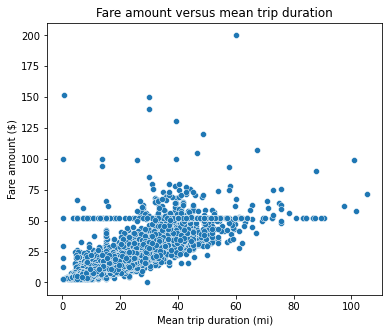

In [77]:
# Create a scatterplot to visualize the relationship between variables of interest
plt.figure(figsize=(6,5))
sns.scatterplot(x='mean_duration', y='fare_amount', data=df1)

# Customize the plot (optional)
plt.title("Fare amount versus mean trip duration")  # Add a title
plt.xlabel("Mean trip duration (mi)")  # Add an x-axis label
plt.ylabel("Fare amount ($)")  # Add a y-axis label
plt.show()

The `mean_duration` variable correlates with the target variable. But what are the horizontal lines around fare amounts of 52 dollars and 63 dollars? What are the values and how many are there?

You know what one of the lines represents. 62 dollars and 50 cents is the maximum that was imputed for outliers, so all former outliers will now have fare amounts of \$62.50. What is the other line?

Check the value of the rides in the second horizontal line in the scatter plot.

**My comment:** Since I did not impute outliers with the maximum value of 62.50 dollars, there is only one horizontal line in my plot - at just over 50 dollars.

In [78]:
weird = (df1['fare_amount'] > 50) & (df1['fare_amount'] < 55) 
df1[weird]['fare_amount'].mode

<bound method Series.mode of 11       52.0
110      52.0
156      51.5
161      52.0
242      53.0
         ... 
22593    52.0
22604    52.0
22620    52.0
22686    52.0
22695    52.0
Name: fare_amount, Length: 528, dtype: float64>

Examine the first 30 of these trips.

In [79]:
# Set pandas to display all columns
weird = (df1['fare_amount'] == 52) 
#with pd.option_context('display.max_columns', None):
#    print(df1[weird].head(30))
df1[weird].head(30)

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,...,tolls_amount,improvement_surcharge,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
11,18600059,2,2017-03-05 19:15:30,2017-03-05 19:52:18,2,18.90,2,N,236,132,...,5.54,0.3,72.92,36.800000,236 132,19.102000,30.843333,Sunday,March,0
110,47959795,1,2017-06-03 14:24:57,2017-06-03 15:31:48,1,18.00,2,N,132,163,...,0.00,0.3,52.80,66.850000,132 163,19.229000,52.941667,Saturday,June,0
161,95729204,2,2017-11-11 20:16:16,2017-11-11 20:17:14,1,0.23,2,N,132,132,...,0.00,0.3,52.80,0.966667,132 132,3.848235,4.954902,Saturday,November,0
247,103404868,2,2017-12-06 23:37:08,2017-12-07 00:06:19,1,18.93,2,N,132,79,...,0.00,0.3,52.80,29.183333,132 79,19.431667,47.275000,Wednesday,December,0
379,80479432,2,2017-09-24 23:45:45,2017-09-25 00:15:14,1,17.99,2,N,132,234,...,5.76,0.3,73.20,29.483333,132 234,17.654000,49.833333,Sunday,September,0
388,16226157,1,2017-02-28 18:30:05,2017-02-28 19:09:55,1,18.40,2,N,132,48,...,5.54,0.3,62.84,39.833333,132 48,18.761905,61.604762,Tuesday,February,1
406,55253442,2,2017-06-05 12:51:58,2017-06-05 13:07:35,1,4.73,2,N,228,88,...,5.76,0.3,58.56,15.616667,228 88,4.730000,15.616667,Monday,June,0
449,65900029,2,2017-08-03 22:47:14,2017-08-03 23:32:41,2,18.21,2,N,132,48,...,5.76,0.3,58.56,45.450000,132 48,18.761905,61.604762,Thursday,August,0
468,80904240,2,2017-09-26 13:48:26,2017-09-26 14:31:17,1,17.27,2,N,186,132,...,5.76,0.3,58.56,42.850000,186 132,17.096000,42.920000,Tuesday,September,0
520,33706214,2,2017-04-23 21:34:48,2017-04-23 22:46:23,6,18.34,2,N,132,148,...,0.00,0.3,57.80,71.583333,132 148,17.994286,46.340476,Sunday,April,0


**Question:** What do you notice about the first 30 trips?

They all have the same ratecode ID: 2, which is for JFK. $52 is probably the rate for airport pickup and dropoff. 

Almost all of them also seem to have the location ID 132 in common (either for the pickup or dropoff location), which is probably the airport's location ID.

### Task 5. Isolate modeling variables

Drop features that are redundant, irrelevant, or that will not be available in a deployed environment.

In [80]:
#First let's check some of the crazy negative values of mta_tax and improvement_surcharge (it seems like these 
#should all have the same values, but some are negative)
print('Original: mta_tax < 0 shape: ', df0[(df0['mta_tax'] < 0)].shape)
print('Original: improvement_surcharge < 0 shape: ', df0[(df0['improvement_surcharge'] < 0)].shape)
print('Now: mta_tax < 0 shape: ', df1[(df1['mta_tax'] < 0)].shape)
print('Now: improvement_surcharge < 0 shape: ', df1[(df1['improvement_surcharge'] < 0)].shape)
#with pd.option_context('display.max_columns', None):
#    print(df1[(df1['improvement_surcharge'] < 0)].head(14))

Original: mta_tax < 0 shape:  (13, 19)
Original: improvement_surcharge < 0 shape:  (14, 19)
Now: mta_tax < 0 shape:  (0, 25)
Now: improvement_surcharge < 0 shape:  (0, 25)


We can see that these rows have already been deleted, so they were from trips that were already flagged as erroneous from the other variables. 

In [81]:
 #Now let's get rid of some columns we don't need - this DF is getting too big
df = df1.drop(columns=['Unnamed: 0', 'VendorID', 'store_and_fwd_flag', 'payment_type', 'PULocationID', \
                       'DOLocationID', 'mta_tax', 'improvement_surcharge'])
df.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,fare_amount,extra,tip_amount,tolls_amount,total_amount,duration,pickup_dropoff,mean_distance,mean_duration,day,month,rush_hour
0,2017-03-25 08:55:43,2017-03-25 09:09:47,6,3.34,1,13.0,0.0,2.76,0.0,16.56,14.066667,100 231,3.521667,22.847222,Saturday,March,0
1,2017-04-11 14:53:28,2017-04-11 15:19:58,1,1.80,1,16.0,0.0,4.00,0.0,20.80,26.500000,186 43,3.108889,24.470370,Tuesday,April,0
2,2017-12-15 07:26:56,2017-12-15 07:34:08,1,1.00,1,6.5,0.0,1.45,0.0,8.75,7.200000,262 236,0.881429,7.250000,Friday,December,1
3,2017-05-07 13:17:59,2017-05-07 13:48:14,1,3.70,1,20.5,0.0,6.39,0.0,27.69,30.250000,188 97,3.700000,30.250000,Sunday,May,0
4,2017-04-15 23:32:20,2017-04-15 23:49:03,1,4.37,1,16.5,0.5,0.00,0.0,17.80,16.716667,4 112,4.435000,14.616667,Saturday,April,0


In [82]:
#Let's get rid of the JFK trips, since there is clearly not a linear relationship between fare_amount and 
#any other variable when this is the case. Also, in this case the driver will already know the amount of 
#the fare before the trip anyway.
print(df[(df['RatecodeID'] == 2)].shape)
df = df[(df['RatecodeID'] != 2)]

(495, 17)


In [83]:
#Let's check how many rows we lost after deleting the ones with suspicious value
print('Shape of original DF: ', df0.shape)
print('Shape of new DF: ', df.shape)

Shape of original DF:  (22699, 19)
Shape of new DF:  (21993, 17)


**My comment:** We still have 21993 out of 22699 point, so 97% of all original points. I'm happy with this. 

### Task 6. Pair plot

Create a pairplot to visualize pairwise relationships between `fare_amount`, `mean_duration`, and `mean_distance`.

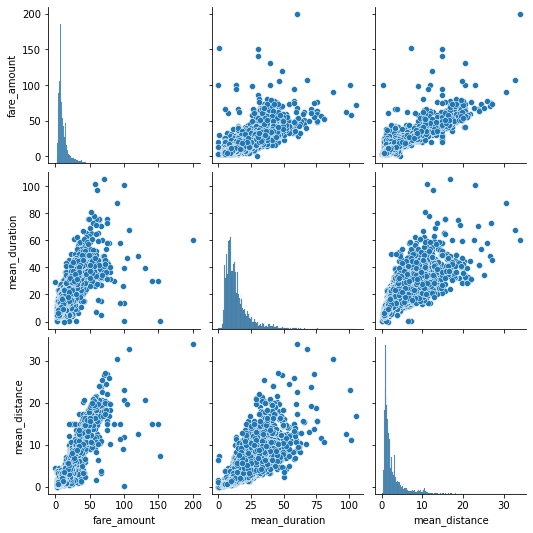

In [84]:
# Create a pairplot to visualize pairwise relationships between variables in the data
sns.pairplot(df[['fare_amount', 'mean_duration', 'mean_distance']])
#sns.pairplot(df[['fare_amount', 'duration', 'trip_distance']])

These variables all show linear correlation with each other. Investigate this further.

### Task 7. Identify correlations

Next, code a correlation matrix to help determine most correlated variables.

In [85]:
# Correlation matrix to help determine most correlated variables
correlation_matrix = df.corr(method='pearson')
correlation_matrix

,passenger_count,trip_distance,RatecodeID,fare_amount,extra,tip_amount,tolls_amount,total_amount,duration,mean_distance,mean_duration,rush_hour
passenger_count,1.000000,0.015483,0.008166,0.013512,-0.009499,-0.007871,0.008564,0.010281,0.011110,0.012265,0.013870,-0.015709
trip_distance,0.015483,1.000000,0.224204,0.935783,0.010108,0.555818,0.538974,0.927722,0.751953,0.969572,0.824957,-0.054740
RatecodeID,0.008166,0.224204,1.000000,0.377073,-0.034841,0.152420,0.362467,0.372783,0.108071,0.227999,0.124915,-0.008232
fare_amount,0.013512,0.935783,0.377073,1.000000,-0.007533,0.567506,0.526742,0.980305,0.866533,0.907411,0.845100,-0.024268
extra,-0.009499,0.010108,-0.034841,-0.007533,1.000000,0.024894,-0.026953,0.028519,-0.001301,0.010896,0.015238,0.307956
tip_amount,-0.007871,0.555818,0.152420,0.567506,0.024894,1.000000,0.432027,0.699440,0.495437,0.546498,0.507120,0.021573
tolls_amount,0.008564,0.538974,0.362467,0.526742,-0.026953,0.432027,1.000000,0.617046,0.366990,0.541493,0.424866,-0.000987
total_amount,0.010281,0.927722,0.372783,0.980305,0.028519,0.699440,0.617046,1.000000,0.841209,0.903037,0.832539,-0.005674
duration,0.011110,0.751953,0.108071,0.866533,-0.001301,0.495437,0.366990,0.841209,1.000000,0.727139,0.853844,0.022714
mean_distance,0.012265,0.969572,0.227999,0.907411,0.010896,0.546498,0.541493,0.903037,0.727139,1.000000,0.851375,-0.055431


Visualize a correlation heatmap of the data.

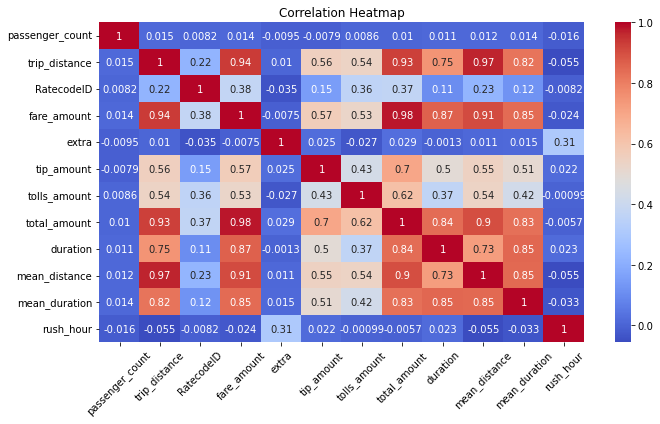

In [86]:
# Create correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')  # Colormap choice can be customized
plt.title("Correlation Heatmap")

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent overlapping elements

# Display the heatmap
plt.show()

**Question:** Which variable(s) are correlated with the target variable of `fare_amount`? 

**My answer:** The variables that are best correlated with the fare amount are the total amount (as is expected), the trip distance, the mean distance (related to the former), the trip duration and the mean trip duration (related to the former). Drivers can know the trip distance before the ride by inserting the pick-up and drop-off locations into any GPS. These will usually also give a good estimate on the trip duration, but not every GPS will be able to estimate this and even the ones that do may not be very accurate. So it is best not to rely on the driver knowing the trip duration before the trip. Therefore, the best variables to use to try to model the fare are trip distance and mean duration.

Try modeling with both variables even though they are correlated.

<img src="images/Construct.png" width="100" height="100" align=left>

## PACE: **Construct**

After analysis and deriving variables with close relationships, it is time to begin constructing the model. Consider the questions in your PACE Strategy Document to reflect on the Construct stage.


### Task 8a. Split data into outcome variable and features

In [87]:
df2 = df[['trip_distance', 'mean_duration', 'fare_amount', 'rush_hour']]

Set your X and y variables. X represents the features and y represents the outcome (target) variable.

In [88]:
# Remove the target column from the features
X = df2.drop(columns='fare_amount')

# Set y variable
Y = df2[['fare_amount']]

# Display first few rows
print(X)
print(Y)

       trip_distance  mean_duration  rush_hour
0               3.34      22.847222          0
1               1.80      24.470370          0
2               1.00       7.250000          1
3               3.70      30.250000          0
4               4.37      14.616667          0
...              ...            ...        ...
22693           0.89       8.095370          0
22694           0.61       8.594643          1
22696           0.42       6.609091          0
22697           2.36      16.650000          0
22698           2.10       9.405556          0

[21993 rows x 3 columns]
       fare_amount
0             13.0
1             16.0
2              6.5
3             20.5
4             16.5
...            ...
22693          7.5
22694          4.0
22696          4.5
22697         10.5
22698         11.0

[21993 rows x 1 columns]


### Task 8b. Pre-process data


Dummy encode categorical variables

In [ ]:
# Convert VendorID to string
### YOUR CODE HERE ###

# Get dummies
### YOUR CODE HERE ###

### Why?? We don't need this variable

### Split data into training and test sets

Create training and testing sets. The test set should contain 20% of the total samples. Set `random_state=0`.

In [89]:
# Create training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

### Standardize the data

Use `StandardScaler()`, `fit()`, and `transform()` to standardize the `X_train` variables. Assign the results to a variable called `X_train_scaled`.

In [165]:
## Standardize the X variables
#scaler = StandardScaler().fit(X_train)
#X_scaled = pd.DataFrame(scaler.transform(X_train))
#X_scaled = X_scaled.rename(columns={0: 'mean_distance', 1: 'mean_duration', 2: 'rush_hour'})
#
## Print the standardized data
#print(X_scaled)

Commented this cell because this data does not need to be scaled for this regression. 

### Fit the model

Instantiate your model and fit it to the training data.

In [110]:
# Fit your model to the training data
ols_data = pd.concat([X_train, Y_train], axis = 1)
ols_formula = 'fare_amount ~ trip_distance + mean_duration'
OLS = ols(formula = ols_formula, data = ols_data)
model = OLS.fit()
model_results = model.summary()
# Display the model results.
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fare_amount   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                 7.479e+04
Date:                Fri, 09 Aug 2024   Prob (F-statistic):               0.00
Time:                        08:59:46   Log-Likelihood:                -44303.
No. Observations:               17594   AIC:                         8.861e+04
Df Residuals:                   17591   BIC:                         8.863e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.5350      0.045     56.154      0.000       2.446       2.623
trip_distance     2.3862      0.014    173.064      0.000       2.359       2.413
mean_duration     0.2400      0.005     52.107      0.000       0.231       0.249
==============================================================================
Omnibus:                    32120.768   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        127860402.835
Skew:                          13.080   Prob(JB):                         0.00
Kurtosis:                     419.810   Cond. No.                         33.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

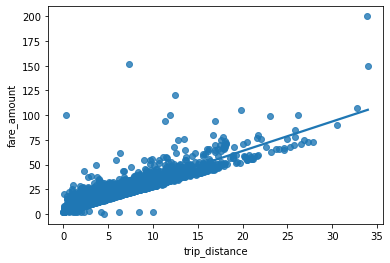

In [111]:
#Look at the fit for the distance, which is the strongest factor in determining fare
#(as can be inferred from the coefficient value)
sns.regplot(x="trip_distance", y="fare_amount", data=ols_data, ci=None)

### Task 8c. Evaluate model

### Train data

Evaluate your model performance by calculating the residual sum of squares and the explained variance score (R^2). Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error.

In [112]:
# Evaluate the model performance on the training data
Y_pred = model.predict(X_train)

# Calculate metrics
mse = metrics.mean_squared_error(Y_train['fare_amount'], Y_pred)
mae = metrics.mean_absolute_error(Y_train['fare_amount'], Y_pred)
r2 = metrics.r2_score(Y_train['fare_amount'], Y_pred)

# Calculate residual sum of squares (RSS) manually
residuals = Y_train['fare_amount'] - Y_pred
rss = np.sum(residuals**2)  # Square the residuals and sum them

# Print the results
print("Residual Sum of Squares (RSS):", rss)
print("R-squared (R^2):", r2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", np.sqrt(mse))

Residual Sum of Squares (RSS): 158508.8822617689
R-squared (R^2): 0.8947705504356279
Mean Absolute Error (MAE): 1.5634292566107693
Mean Squared Error (MSE): 9.009257830042564
Root Mean Squared Error (RMSE): 3.0015425750841125


### Test data

Calculate the same metrics on the test data. Remember to scale the `X_test` data using the scaler that was fit to the training data. Do not refit the scaler to the testing data, just transform it. Call the results `X_test_scaled`.

In [113]:
## Scale the X_test data
#X_scaled_test = pd.DataFrame(scaler.transform(X_test))
#X_scaled_test = X_scaled_test.rename(columns={0: 'mean_distance', 1: 'mean_duration', 2: 'rush_hour'})

In [114]:
# Evaluate the model performance on the testing data
Y_pred_test = model.predict(X_test)

# Calculate metrics
mse = metrics.mean_squared_error(Y_test['fare_amount'], Y_pred_test)
mae = metrics.mean_absolute_error(Y_test['fare_amount'], Y_pred_test)
r2 = metrics.r2_score(Y_test['fare_amount'], Y_pred_test)

# Calculate residual sum of squares (RSS) manually
residuals = Y_test['fare_amount'] - Y_pred_test
rss = np.sum(residuals**2)  # Square the residuals and sum them

# Print the results
print("Residual Sum of Squares (RSS):", rss)
print("R-squared (R^2):", r2)
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", np.sqrt(mse))

Residual Sum of Squares (RSS): 41066.697154342706
R-squared (R^2): 0.8822704631570869
Mean Absolute Error (MAE): 1.5313034289064196
Mean Squared Error (MSE): 9.335461958250217
Root Mean Squared Error (RMSE): 3.055398821471629


<img src="images/Execute.png" width="100" height="100" align=left>

## PACE: **Execute**

Consider the questions in your PACE Strategy Document to reflect on the Execute stage.

### Task 9a. Results

Use the code cell below to get `actual`,`predicted`, and `residual` for the testing set, and store them as columns in a `results` dataframe.

In [115]:
# Create a `results` dataframe
results = pd.concat([Y_test, Y_pred_test, residuals], axis=1)
results = results.rename(columns={'fare_amount': 'actual', 0: 'predicted', 1: 'residual'})
results.head()

,actual,predicted,residual
3714,9.0,9.119357,-0.119357
13997,8.0,8.438566,-0.438566
11181,6.0,8.528901,-2.528901
5512,9.0,7.933879,1.066121
19788,10.0,8.895071,1.104929


### Task 9b. Visualize model results

Create a scatterplot to visualize `actual` vs. `predicted`.

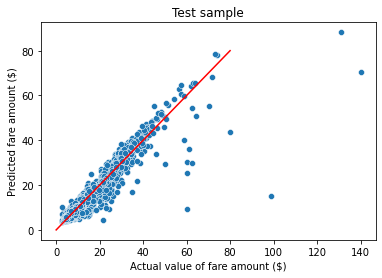

In [116]:
# Create a scatterplot to visualize `predicted` over `actual`
sns.scatterplot(x='actual', y='predicted', data=results)

# Customize the plot (optional)
plt.title("Test sample")  # Add a title
plt.xlabel("Actual value of fare amount ($)")  # Add an x-axis label
plt.ylabel("Predicted fare amount ($)")  # Add a y-axis label
plt.plot([0,80], [0,80], c='red') #Plot line through 1-1 values
plt.show()

Visualize the distribution of the `residuals` using a histogram.

Text(0.5, 0, 'Residuals')

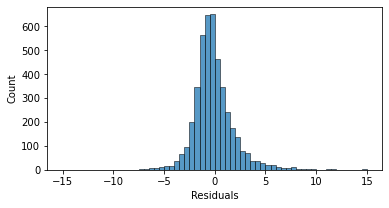

In [117]:
# Visualize the distribution of the `residuals`
plt.figure(figsize=(6,3))
sns.histplot(x='residual', data=results, bins=np.arange(-15,15.5,0.5))
plt.xlabel("Residuals")  # Add an x-axis label

In [125]:
# Calculate residual mean
print('Mean residual: ', results['residual'].mean())
print(results['residual'].describe())
print('2.5th and 97.5th percentiles: ', np.percentile(results['residual'], [2.5, 97.5])) #95% of residuals are within this range

Mean residual:  0.004083152178735012
count    4399.000000
mean        0.004083
std         3.055743
min       -10.247912
25%        -1.225103
50%        -0.357867
75%         0.724076
max        83.794289
Name: residual, dtype: float64
2.5th and 97.5th percentiles:  [-3.43083021  5.06093712]


Create a scatterplot of `residuals` over `predicted`.

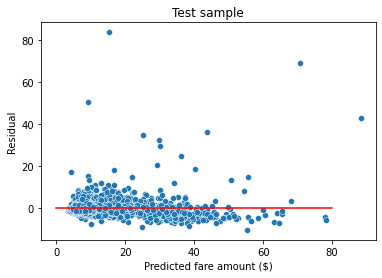

In [119]:
# Create a scatterplot of `residuals` over `predicted`
sns.scatterplot(x='predicted', y='residual', data=results)

# Customize the plot (optional)
plt.title("Test sample")  # Add a title
plt.xlabel("Predicted fare amount ($)")  # Add an x-axis label
plt.ylabel("Residual")  # Add a y-axis label
plt.plot([0,80], [0,0], c='red') #Plot line through y=0
plt.show()

### Task 9c. Coefficients

Use the `coef_` attribute to get the model's coefficients. The coefficients are output in the order of the features that were used to train the model. Which feature had the greatest effect on trip fare?

In [120]:
# Output the model's coefficients
model_results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            fare_amount   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.895
Method:                 Least Squares   F-statistic:                 7.479e+04
Date:                Fri, 09 Aug 2024   Prob (F-statistic):               0.00
Time:                        08:59:46   Log-Likelihood:                -44303.
No. Observations:               17594   AIC:                         8.861e+04
Df Residuals:                   17591   BIC:                         8.863e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         2.5350      0.045     56.154      0.000       2.446       2.623
trip_distance     2.3862      0.014    173.064      0.000       2.359       2.413
mean_duration     0.2400      0.005     52.107      0.000       0.231       0.249
==============================================================================
Omnibus:                    32120.768   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        127860402.835
Skew:                          13.080   Prob(JB):                         0.00
Kurtosis:                     419.810   Cond. No.                         33.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

What do these coefficients mean? How should they be interpreted?

The trip distance had the greatest effect on the trip fare. The coefficients for trip distance and mean duration are 2.386 and 0.24, respectively, which means that for every 1mi travelled, the fare increases by $\$2.39$ and for every 1 minute longer, the fare increases by $\$0.24$. 


### Task 9d. Conclusion

1. What are the key takeaways from this notebook?



2. What results can be presented from this notebook?



This model presents a good prediction of the taxi fares in the cases when the pickup or final destination is not JFK airport (RatecodeID=2). In those cases the flat-rate value of $\$52$ can be applied with no need of a regression model. 

There are a few outliers in the predicted vs residual plots, but all in all it is a very good model. The value of $R^2$ was 0.895, which means that 89.5\% of the fare can be accounted for by the model. The p-value for both coefficients is $0.000$, meaning they are both statistically significant at $p=0.05$. 

The rush_hour column did not correlate almost at all with the fare amount, which seems a bit unintuitive, but because of this we did not include it in the final model.

**Congratulations!** You've completed this lab. However, you may not notice a green check mark next to this item on Coursera's platform. Please continue your progress regardless of the check mark. Just click on the "save" icon at the top of this notebook to ensure your work has been logged. 